In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Importing Data

In [2]:
df = pd.read_csv("pakwheels_pakistan_automobile_dataset.csv")
df.head(100)

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,2024-05-04,Medium,Medium,Saturday,10
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,2024-05-04,High,Medium,Saturday,4
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,2024-05-04,Low,Medium,Saturday,7
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,2024-05-04,High,Low,Saturday,3
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,2024-05-04,High,Low,Saturday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Suzuki Swift GL CVT 2022,4150000,Karachi,2022,25000,Petrol,Automatic,Sindh,Solid White,Local,1240,2024-05-04,High,Low,Saturday,2
96,Toyota Corolla Altis Grande X CVT-i 1.8 Black ...,6850000,Karachi,2022,41000,Petrol,Automatic,Sindh,Attitude Black,Local,1800,2024-05-03,High,Low,Friday,2
97,Toyota Corolla XLi VVTi 2014,2970000,Islamabad,2014,190000,Petrol,Not Available,Lahore,Black,Local,1300,2024-05-04,Medium,High,Saturday,10
98,Mercedes Benz C Class C180 2006,3800000,Lahore,2006,157355,Petrol,Automatic,Lahore,Iridium Silver,Local,1800,2024-05-04,Medium,High,Saturday,18


### **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48189 entries, 0 to 48188
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             48189 non-null  object
 1   price             48189 non-null  int64 
 2   city              48189 non-null  object
 3   model             48189 non-null  int64 
 4   mileage           48189 non-null  int64 
 5   fuel_type         48189 non-null  object
 6   transmission      48189 non-null  object
 7   registered        48189 non-null  object
 8   color             48189 non-null  object
 9   assembly          48189 non-null  object
 10  engine_capacity   48189 non-null  int64 
 11  post_date         48189 non-null  object
 12  price_category    48189 non-null  object
 13  mileage_category  48189 non-null  object
 14  post_day_of_week  48189 non-null  object
 15  vehicle_age       48189 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

title               0
price               0
city                0
model               0
mileage             0
fuel_type           0
transmission        0
registered          0
color               0
assembly            0
engine_capacity     0
post_date           0
price_category      0
mileage_category    0
post_day_of_week    0
vehicle_age         0
dtype: int64

In [5]:
df.describe()

,price,model,mileage,engine_capacity,vehicle_age
count,4.818900e+04,48189.000000,48189.000000,48189.000000,48189.000000
mean,4.300611e+06,2013.690074,90444.885327,1417.805038,10.309926
std,6.285592e+06,7.511492,85300.588856,715.792743,7.511492
min,0.000000e+00,1990.000000,1.000000,100.000000,0.000000
25%,1.689999e+06,2008.000000,36000.000000,1000.000000,4.000000
50%,3.000000e+06,2016.000000,79192.000000,1300.000000,8.000000
75%,4.750000e+06,2020.000000,122456.000000,1600.000000,16.000000
max,1.750000e+08,2024.000000,1000000.000000,15000.000000,34.000000


In [6]:
df.dtypes

title               object
price                int64
city                object
model                int64
mileage              int64
fuel_type           object
transmission        object
registered          object
color               object
assembly            object
engine_capacity      int64
post_date           object
price_category      object
mileage_category    object
post_day_of_week    object
vehicle_age          int64
dtype: object

In [7]:
df['post_date'] = pd.to_datetime(df['post_date'])

In [8]:
df.dtypes

title                       object
price                        int64
city                        object
model                        int64
mileage                      int64
fuel_type                   object
transmission                object
registered                  object
color                       object
assembly                    object
engine_capacity              int64
post_date           datetime64[ns]
price_category              object
mileage_category            object
post_day_of_week            object
vehicle_age                  int64
dtype: object

In [9]:
zero_price_rows = df[df['price'] == 0]

num_zero_price_rows = len(zero_price_rows)
print(f"Number of rows with price 0: {num_zero_price_rows}")

total_rows = len(df)
print(f"Total number of rows: {total_rows}")

percentage_zero_price = (num_zero_price_rows / total_rows) * 100
print(f"Percentage of rows with price 0: {percentage_zero_price:.2f}%")

df_cleaned = df[df['price'] != 0]

df = df_cleaned

num_rows_after_drop = len(df)
print(f"Number of rows after dropping zero price: {num_rows_after_drop}")

Number of rows with price 0: 496
Total number of rows: 48189
Percentage of rows with price 0: 1.03%
Number of rows after dropping zero price: 47693


In [10]:
frequency = df['title'].value_counts()
frequency

title
Honda Civic Oriel 1.8 i-VTEC CVT 2018       319
Honda Civic Oriel 1.8 i-VTEC CVT 2017       288
Honda Civic Oriel 1.8 i-VTEC CVT 2021       265
Suzuki Alto VXR 2022                        236
Suzuki Mehran VXR Euro II 2018              215
                                           ... 
Daihatsu Charade 1995                         1
BMW 5 Series 525i 2009                        1
Honda Civic VTi Oriel Automatic 1.6 1988      1
Nissan X Trail 2006                           1
JMC New Boarding 2017                         1
Name: count, Length: 7286, dtype: int64

In [11]:
n = 10
most_listed_cars = frequency.head(n)
print(f"Most selling Cars:\n\n",most_listed_cars)

Most selling Cars:

 title
Honda Civic Oriel 1.8 i-VTEC CVT 2018        319
Honda Civic Oriel 1.8 i-VTEC CVT 2017        288
Honda Civic Oriel 1.8 i-VTEC CVT 2021        265
Suzuki Alto VXR 2022                         236
Suzuki Mehran VXR Euro II 2018               215
Honda City 1.3 i-VTEC 2018                   179
Honda Civic Oriel 1.8 i-VTEC CVT 2020        171
Toyota Corolla Altis X Automatic 1.6 2021    165
Suzuki Mehran VXR Euro II 2017               161
Honda Civic Oriel 1.8 i-VTEC CVT 2019        159
Name: count, dtype: int64


#### Most costly cars

In [12]:
most_costly_cars = df.nlargest(10, 'price')
most_costly_cars

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
17774,Mercedes Benz G Class G 63 AMG 2021,175000000,Lahore,2021,42530,Petrol,Automatic,Punjab,Grey,Imported,4000,2024-04-30,High,Low,Tuesday,3
43154,Lexus LX Series LX 600 Ultra Luxury 2024,160000000,Karachi,2024,1,Petrol,Automatic,Un-Registered,Black,Imported,3500,2024-04-15,High,Low,Monday,0
7033,BMW X7 xDrive40i 2023,150000000,Lahore,2023,100,Petrol,Automatic,Un-Registered,Arctic Grey,Imported,3000,2024-04-29,High,Low,Monday,1
14567,Mercedes Benz S Class 2022,147500000,Islamabad,2022,7000,Petrol,Automatic,Un-Registered,White,Imported,4000,2024-04-12,High,Low,Friday,2
47253,Lexus LX Series LX 600 Ultra Luxury 2023,140000000,Karachi,2023,1,Petrol,Automatic,Un-Registered,Black,Imported,3500,2024-04-10,High,Low,Wednesday,1
3711,Lexus LX Series LX 600 Ultra Luxury 2022,132500000,Karachi,2022,120,Petrol,Automatic,Un-Registered,White,Imported,3500,2024-05-02,High,Low,Thursday,2
17838,Mercedes Benz E Class Coupe 2022,130000000,Lahore,2022,7800,Petrol,Automatic,Punjab,Black,Imported,4000,2024-04-30,High,Low,Tuesday,2
263,Lexus LX Series LX 600 Ultra Luxury 2022,117500000,Karachi,2022,2000,Petrol,Automatic,Un-Registered,White,Imported,3500,2024-05-03,High,Low,Friday,2
30909,Porsche Panamera Turbo S E-Hybrid Executive 2018,100000000,Karachi,2018,30000,Hybrid,Automatic,Lahore,Volcano Grey,Imported,4000,2024-04-23,High,Low,Tuesday,6
27481,Lexus LX Series LX570 2021,95000000,Karachi,2021,3200,Petrol,Automatic,Karachi,White,Imported,5700,2024-04-25,High,Low,Thursday,3


#### Most affordable cars

In [13]:
most_affordable_cars = df.nsmallest(10, 'price')
most_affordable_cars

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age
236,Suzuki Liana LXi Sport 2006,114999,Islamabad,2006,339000,Petrol,Not Available,Islamabad,Silver,Local,1300,2024-05-04,Low,High,Saturday,18
1776,Suzuki Mehran VXR Euro II 2014,114999,Nankana sahib,2014,60000,Petrol,Not Available,Lahore,Graphite Grey,Local,796,2024-05-03,Low,Medium,Friday,10
38724,Suzuki Bolan 2015,122000,Lahore,2015,11253,Petrol,Not Available,Lahore,Red,Imported,800,2024-05-08,Low,Low,Wednesday,9
47062,Suzuki FX GA 1984,125000,Karachi,2002,250000,Petrol,Not Available,Sindh,Dark Blue,Local,800,2024-04-11,Low,High,Thursday,22
39650,Toyota Fortuner 2.7 G 2021,138000,Talagang,2021,8000,Petrol,Automatic,Islamabad,White,Local,2700,2024-05-08,Low,Low,Wednesday,3
2583,Suzuki Liana Eminent Automatic 2006,140000,Gujranwala,2006,35000,Petrol,Automatic,Karachi,White,Imported,1300,2024-05-03,Low,Low,Friday,18
15362,Suzuki FX GA 1987,150000,Sahiwal,2006,100000,Petrol,Not Available,Sheikhupura,Grey,Imported,800,2024-05-01,Low,Medium,Wednesday,18
48183,Suzuki Bolan 2020,155000,Depal pur,2020,80000,Petrol,Not Available,Lahore,White,Local,660,2024-05-09,Low,Medium,Thursday,4
43876,Daihatsu Charade CS 1984,160000,Gujrat,2006,100000,Petrol,Not Available,Lahore,Blue,Imported,1000,2024-04-15,Low,Medium,Monday,18
46349,Suzuki FX GA 1987,160000,Sheikhupura,2007,145286,Petrol,Not Available,Karachi,White,Local,800,2024-04-12,Low,High,Friday,17


In [14]:
df['price'][39650] = 13800000
df['price'][38724] = 750000
df['price'][2583] = 1050000
df['price'][48183] = 1550000
df['price'][1776] = 910000
df['price'][236] = 920000
df['price'][22955] = 720000

C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\2704162664.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['price'][39650] = 13800000
C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\2704162664.py:2: FutureWarni

In [15]:
distinct_values = df['assembly'].unique()
distinct_values

df['assembly_bin'] = df['assembly'].replace({"Local" : 0,"Imported":1})

C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\508602423.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['assembly_bin'] = df['assembly'].replace({"Local" : 0,"Imported":1})


In [16]:
distinct_val = df['mileage_category'].unique()
distinct_val

df['mileage_cat_bin'] = df['mileage_category'].replace({"Low":0,"Medium":1,"High":2})

C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\3428301807.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mileage_cat_bin'] = df['mileage_category'].replace({"Low":0,"Medium":1,"High":2})


In [17]:
distinct_value = df['fuel_type'].unique()
print(distinct_value)

df['fuel_bin'] = df['fuel_type'].replace({"Petrol":0,"Hybrid":1,"Diesel":2,'Not Available':3})

['Petrol' 'Hybrid' 'Not Available' 'Diesel']


C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\3525123340.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fuel_bin'] = df['fuel_type'].replace({"Petrol":0,"Hybrid":1,"Diesel":2,'Not Available':3})


In [18]:
dis_tran = df['transmission'].unique()
print(dis_tran)

df['transmission_bin'] = df['transmission'].replace({"Automatic":0,"Manual":1,"Not Available":2})

['Automatic' 'Not Available' 'Manual']


C:\Users\M Khubaib Ahmad\AppData\Local\Temp\ipykernel_17120\2522158250.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission_bin'] = df['transmission'].replace({"Automatic":0,"Manual":1,"Not Available":2})


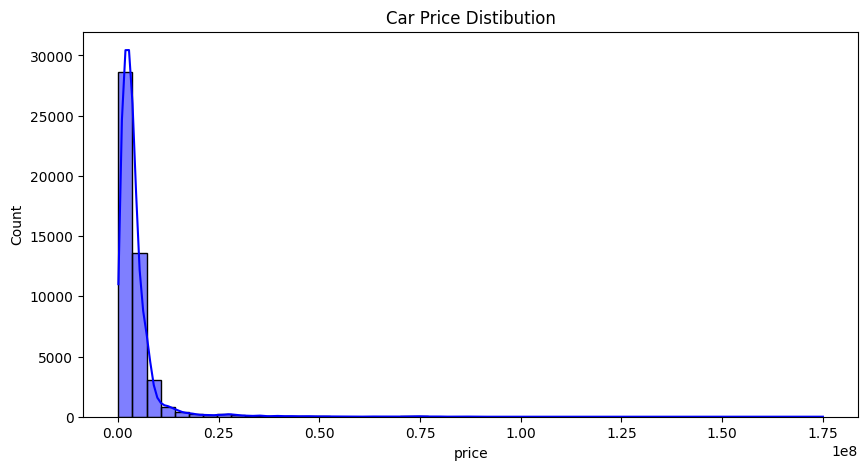

In [19]:
plt.figure(figsize=(10,5))

sns.histplot(df['price'] , bins = 50,kde=True,color='blue')
plt.title("Car Price Distibution")
plt.show()

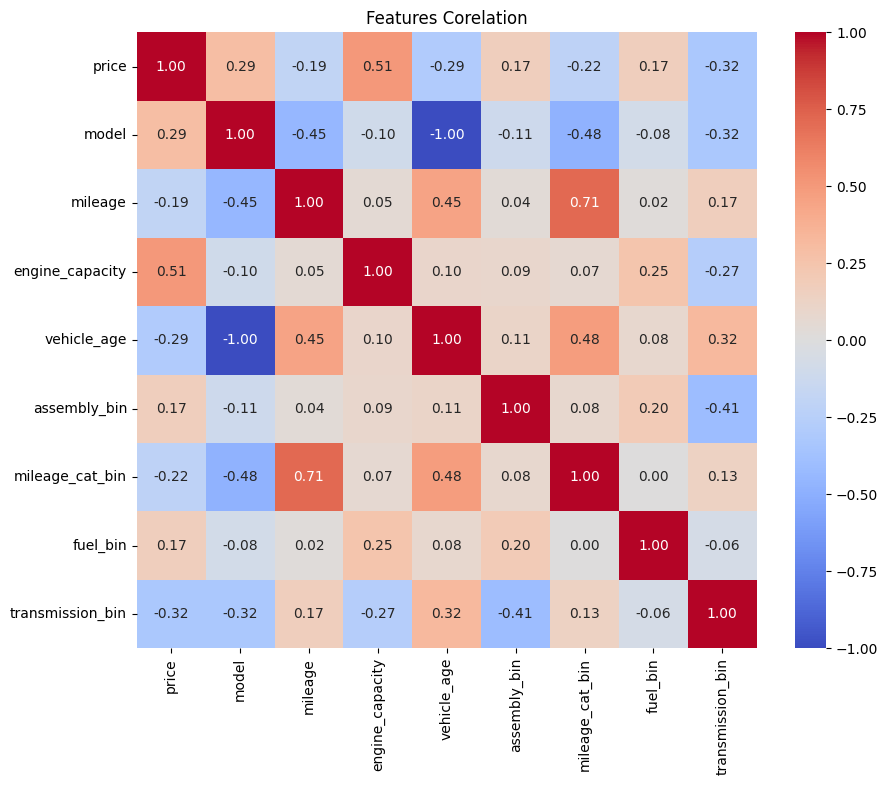

In [20]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Features Corelation")
plt.show()

In [21]:
distinct_alue = df['registered'].unique()
print(distinct_alue)

['Lahore' 'Un-Registered' 'Islamabad' 'Karachi' 'Punjab' 'Sindh'
 'Peshawar' 'Badin' 'Rawalpindi' 'Mirpur A.K.' 'Muzaffarabad' 'Gujranwala'
 'Sialkot' 'Quetta' 'Faisalabad' 'Bahawalpur' 'Lodhran' 'Multan'
 'Farooqabad' 'Abbottabad' 'Okara' 'Dera ismail khan' 'Sargodha' 'Sahiwal'
 'Bannu' 'Sheikhupura' 'Jhelum' 'Rahim Yar Khan' 'Mardan' 'Gujrat'
 'Hyderabad' 'Lasbela' 'Jhang' 'Swat' 'Vehari' 'Haripur' 'Mian Wali'
 'Larkana' 'Mian Channu' 'Tank' 'Hub-Balochistan' 'Kohat'
 'Mandi bahauddin' 'Buner' 'Chitral' 'Chakwal' 'Attock' 'Mansehra'
 'Bhakkar' 'Gilgit' 'Kotli Ak' 'Malakand Agency' 'Nowshera'
 'Toba Tek Singh' 'Arifwala' 'D.G.Khan' 'Jhal Magsi' 'Swabi' 'Narowal'
 'Kashmir' 'Bahawalnagar' 'Iskandarabad' 'Bhalwal' 'Khanewal'
 'Chichawatni' 'Charsadda' 'Muzaffar Gargh' 'Allahabad' 'Thatta'
 'Adda shaiwala' 'Sukkur' 'Dir' 'Jacobabad' 'Kahuta' 'Lower Dir' 'Taxila'
 'Hala' 'Nankana sahib' 'Sambrial' 'Karak' 'Nawabshah' 'Sanghar' 'Kharian'
 'Khyber' 'Hafizabad' 'Mirpur khas' 'Sadiqabad' 'Lay

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47693 entries, 0 to 48188
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             47693 non-null  object        
 1   price             47693 non-null  int64         
 2   city              47693 non-null  object        
 3   model             47693 non-null  int64         
 4   mileage           47693 non-null  int64         
 5   fuel_type         47693 non-null  object        
 6   transmission      47693 non-null  object        
 7   registered        47693 non-null  object        
 8   color             47693 non-null  object        
 9   assembly          47693 non-null  object        
 10  engine_capacity   47693 non-null  int64         
 11  post_date         47693 non-null  datetime64[ns]
 12  price_category    47693 non-null  object        
 13  mileage_category  47693 non-null  object        
 14  post_day_of_week  47693 non

### Price Distribution

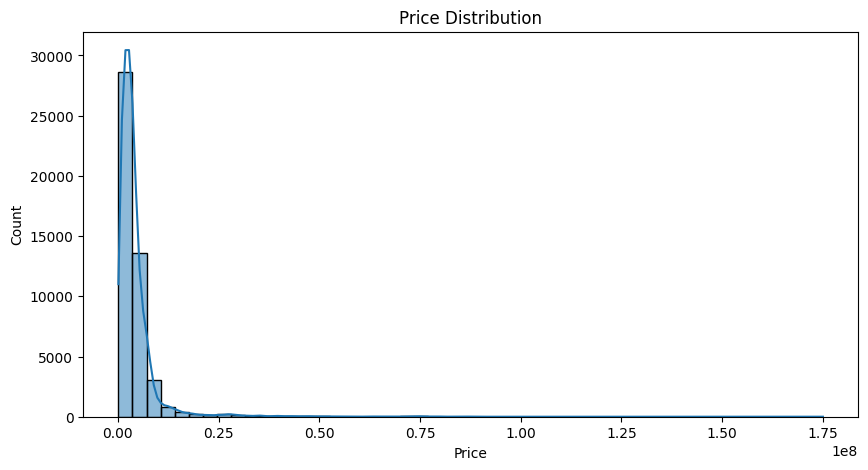

In [23]:
plt.figure(figsize=(10, 5))        
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Distribution")
plt.show()

In [24]:
df['fuel_type'] = df['fuel_type'].replace({"Not Available":"CNG"})

### Fuel_Type  VS  Price

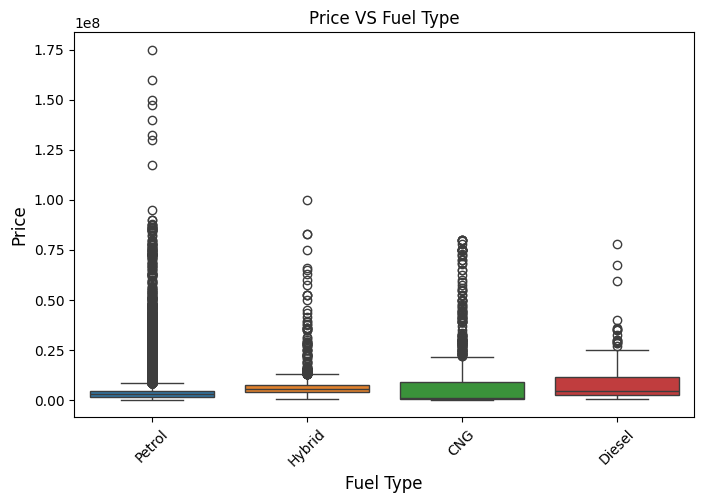

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel_type', y='price', data=df,hue='fuel_type')
plt.xlabel("Fuel Type",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.title("Price VS Fuel Type")
plt.xticks(rotation=45)
plt.show()

### Transmission VS Price

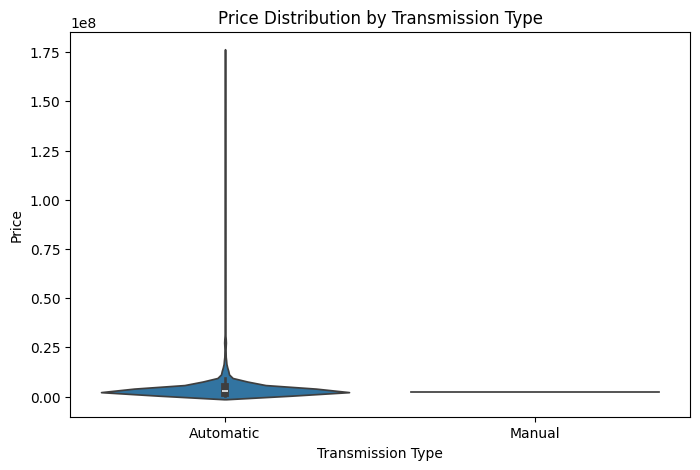

In [26]:
df['transmission'] = df['transmission'].replace({"Not Available":df['transmission'].mode()[0]})
plt.figure(figsize=(8, 5))
sns.violinplot(x='transmission', y='price', data=df)
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.title("Price Distribution by Transmission Type")
plt.show()

### Top 10 cities with most listing

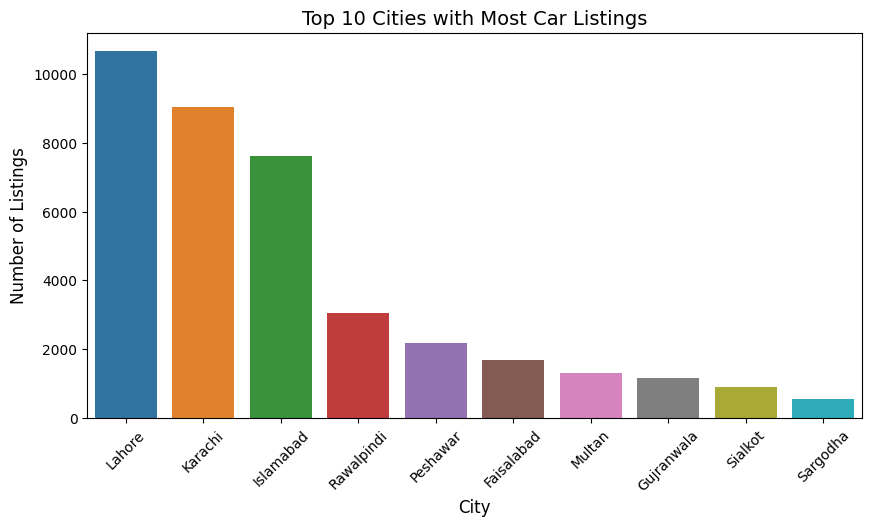

In [27]:
plt.figure(figsize=(10, 5))         
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values,hue=top_cities.index)
plt.xlabel("City",fontsize=12)
plt.ylabel("Number of Listings",fontsize=12)
plt.title("Top 10 Cities with Most Car Listings",fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Top 10 colors of listed cars 

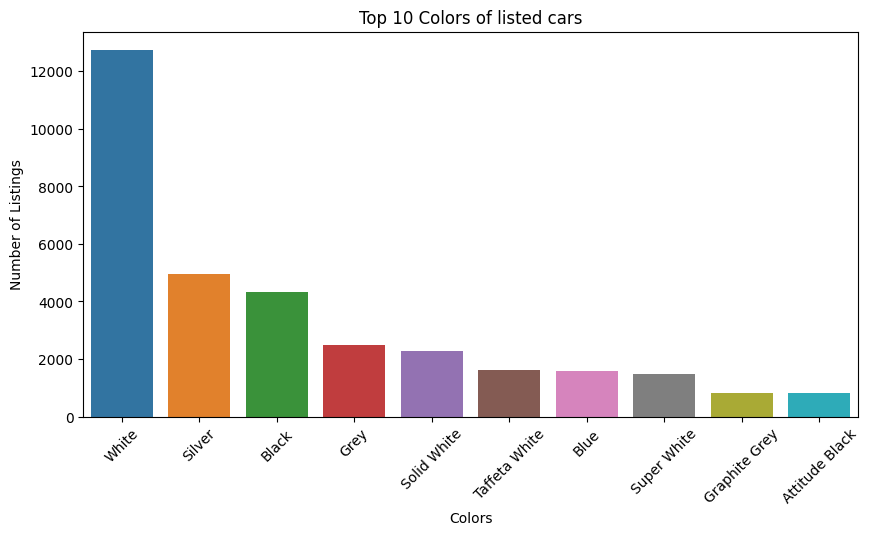

In [28]:
plt.figure(figsize=(10, 5))         
top_color_cars = df['color'].value_counts().nlargest(10)
sns.barplot(x=top_color_cars.index, y=top_color_cars.values,hue=top_color_cars.index)
plt.xlabel("Colors")
plt.ylabel("Number of Listings")
plt.title("Top 10 Colors of listed cars")
plt.xticks(rotation=45)
plt.show()

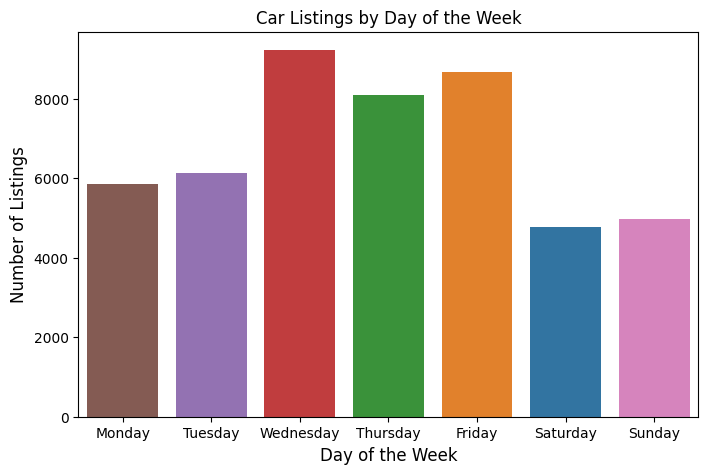

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='post_day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],hue='post_day_of_week')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.title("Car Listings by Day of the Week")
plt.show()                         

In [30]:
m = 10
val = df['color'].value_counts().nlargest(m)
val

color
White             12738
Silver             4938
Black              4336
Grey               2481
Solid White        2292
Taffeta White      1625
Blue               1565
Super White        1475
Graphite Grey       831
Attitude Black      814
Name: count, dtype: int64

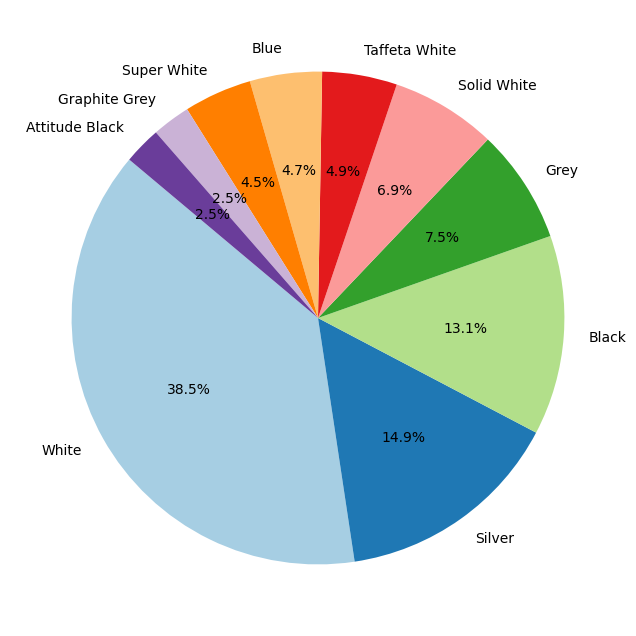

In [31]:
# pie chart oncolors of cars
colors_colormap = plt.cm.Paired(range(len(val)))
plt.figure(figsize=(8,8))
plt.pie(val, labels=val.index, autopct='%1.1f%%', startangle=140, colors = colors_colormap)
plt.show()

### Vehicle age VS Price

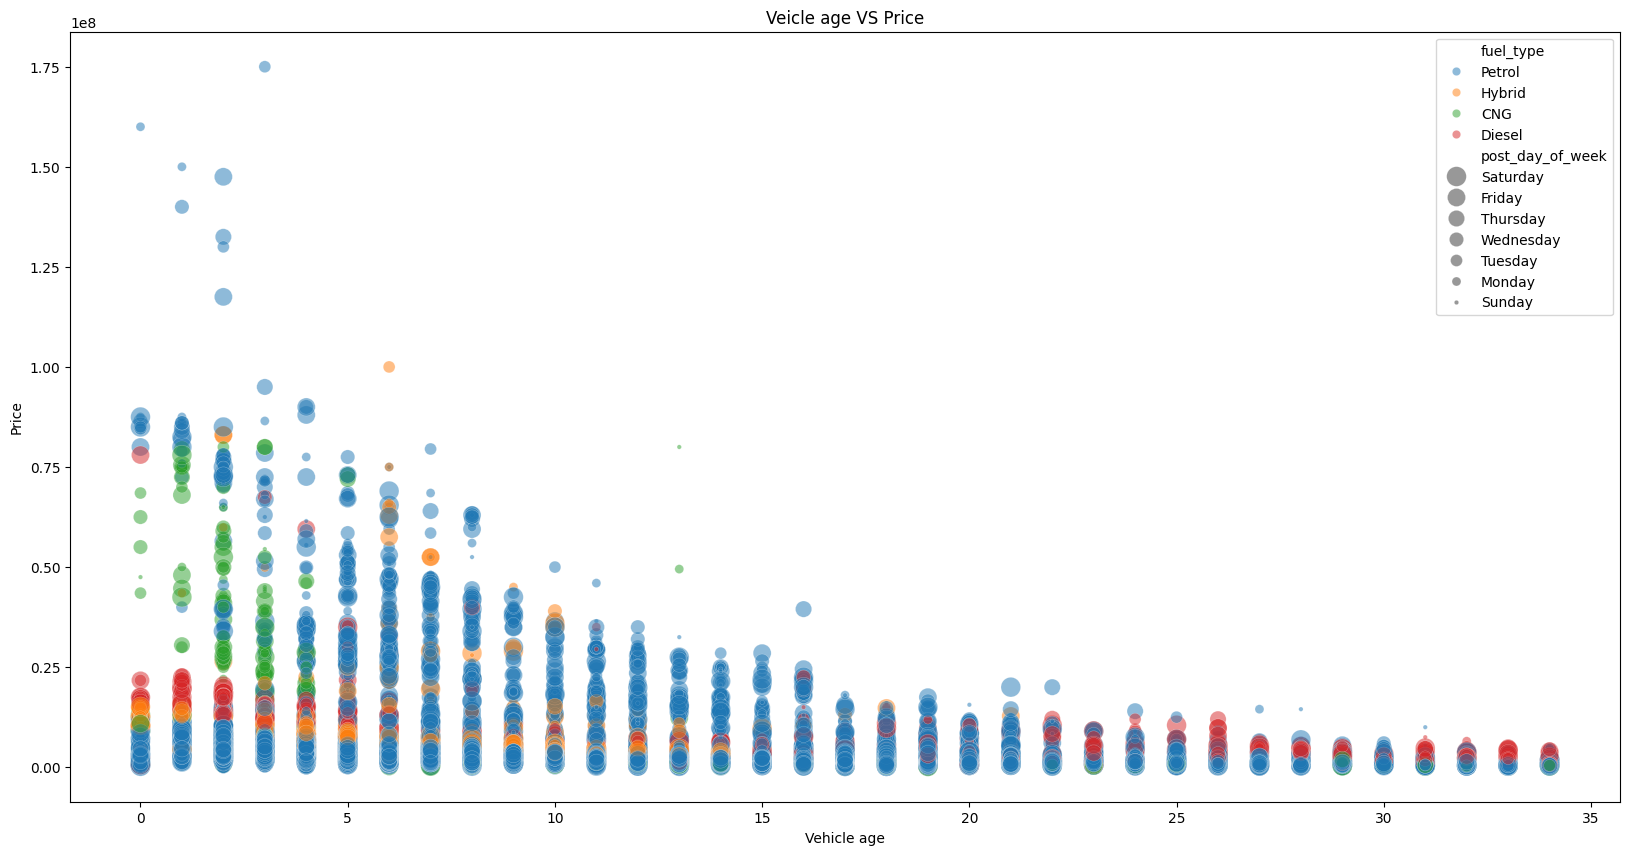

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['vehicle_age'],y=df['price'],alpha=0.5,hue=df['fuel_type'],size=df['post_day_of_week'],color='Reds_r',sizes=(10,200))
plt.xlabel("Vehicle age")
plt.ylabel("Price")
plt.title("Veicle age VS Price")
plt.show()

In [33]:
df.columns

Index(['title', 'price', 'city', 'model', 'mileage', 'fuel_type',
       'transmission', 'registered', 'color', 'assembly', 'engine_capacity',
       'post_date', 'price_category', 'mileage_category', 'post_day_of_week',
       'vehicle_age', 'assembly_bin', 'mileage_cat_bin', 'fuel_bin',
       'transmission_bin'],
      dtype='object')

>###  Training price prediction model

##### Encoding Categorial values

In [34]:
encoders = {}
categorial_columns = ['title','assembly','mileage_category','fuel_type','transmission','city','color','registered']
for col in categorial_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 

##### Splitting data and training model

In [35]:
X = df[['title','model','assembly','mileage_category','fuel_type','engine_capacity','transmission','city','color','vehicle_age','registered']]
y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model

RandomForestRegressor(random_state=42)

##### Prediction on sample dataset

In [45]:
example_df = pd.DataFrame([{
    'title' : encoders['title'].transform(['Honda N One Premium 2014'])[0],
    'model' : 2014,
    'assembly': encoders['assembly'].transform(['Imported'])[0],
    'mileage_category': encoders['mileage_category'].transform(['Low'])[0],
    'fuel_type': encoders['fuel_type'].transform(['Petrol'])[0],
    'engine_capacity': 660,
    'transmission': encoders['transmission'].transform(['Automatic'])[0],
    'city': encoders['city'].transform(['Lahore'])[0],
    'color': encoders['color'].transform(['Blue'])[0],
    'vehicle_age': 3,
    'registered': encoders['registered'].transform(['Lahore'])[0]
}])

predicted_price = model.predict(example_df)
y_pred = model.predict(X_test)
print("Predicted Price: Rs.", int(predicted_price[0]))

Predicted Price: Rs. 2840910


##### Model Accuracy

In [37]:
score = model.score(X_test,y_test)
print(f"Model accuracy Score = {score:.2%}")

Model accuracy Score = 93.50%


##### MSE, MAE, RMSE, R2

In [38]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2800874680563.78
Mean Absolute Error: 429161.74
Root Mean Squared Error: 1673581.39
R^2 Score: 0.93


##### Comparison between actual & predicted prices

In [39]:
comparison_df = pd.DataFrame({
    'Actual Price' : y_test.values,
    'Predicted Price' : y_pred.astype(int)
})

com_df = comparison_df.tail(10)
com_df

,Actual Price,Predicted Price
9529,1895000,1838214
9530,1450000,1405349
9531,1900000,1810050
9532,47000000,45071500
9533,1425000,1486616
9534,1800000,1961699
9535,8600000,8639230
9536,750000,870079
9537,1290000,1461080
9538,4050000,4156191


##### Bar Plot on Actual & Predicted Price

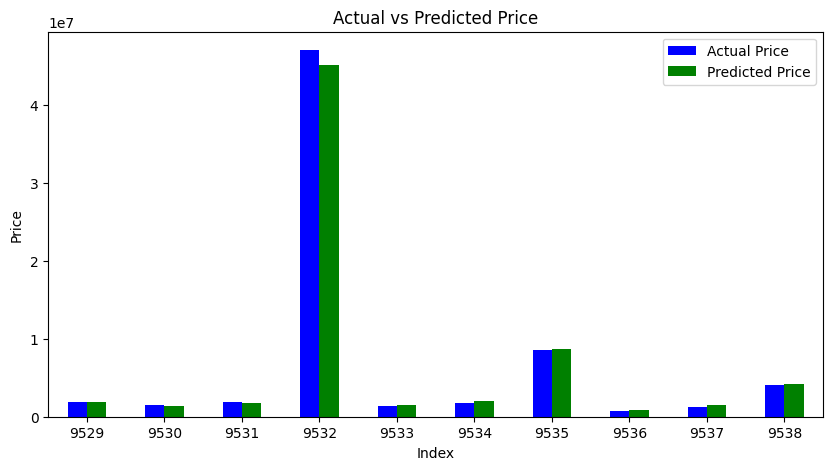

In [40]:
com_df.plot(kind = 'bar', figsize=(10, 5), color=['blue', 'green'])
plt.xlabel("Index")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.title("Actual vs Predicted Price")
plt.show()


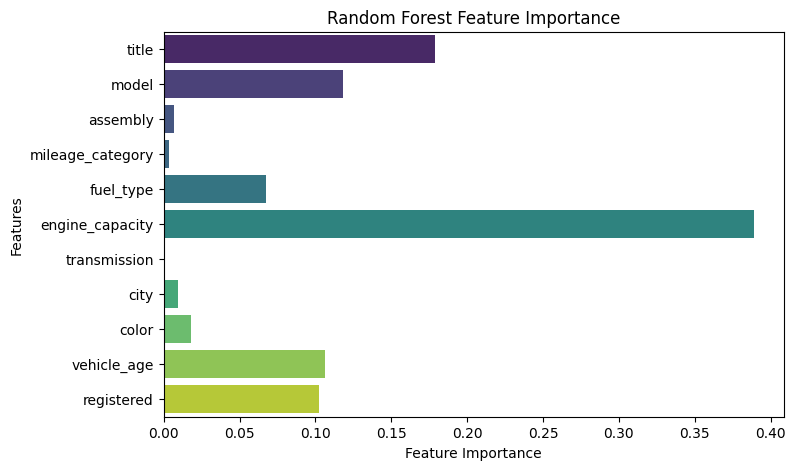

In [41]:
features = X.columns
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette='viridis',hue=features,legend=False)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

##### Scatter plot

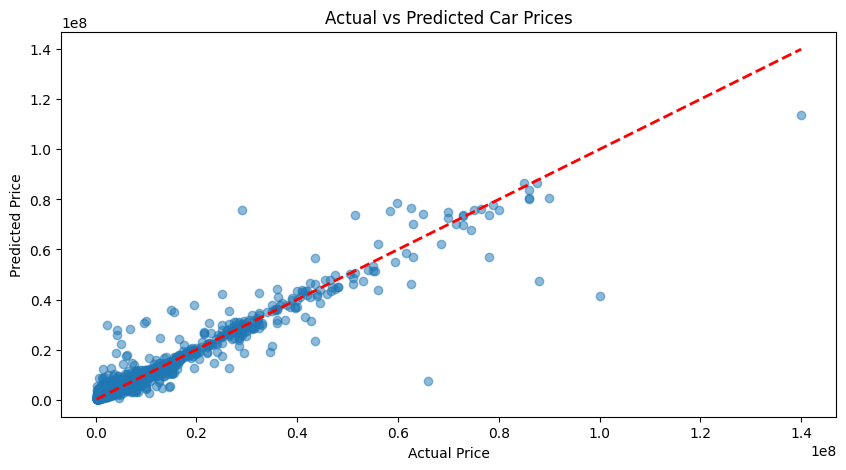

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [43]:
# Save model and encoders (do this in your notebook)
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)


In [44]:
joblib.dump(model, 'model_compressed.pkl', compress=3)

['model_compressed.pkl']